# Online Retail - EDA

Company - UK-based and registered non-store online retail
Products for selling - Mainly all-occasion gifts
Customers - Most are wholesalers (local or international)
Transactions Period - **1st Dec 2009 - 9th Dec 2011 (One year)**

# Results obtained from Exploratory Data Analysis (EDA)

1. The **customer with the highest number of orders comes from the United Kingdom (UK)** 
2. The **customer with the highest money spent on purchases comes from Netherlands** 
3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below: 
    - United Kingdom 
	- Germany 
	- France
	- Ireland (EIRE)
	- Spain
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below: 
    - United Kingdom 
	- Netherlands
	- Ireland (EIRE)
	- Germany
	- France
5. **November 2011 has the highest sales** 
	- The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December 
6. There are **no transactions on Saturday** between 1st Dec 2010 - 9th Dec 2011 and only a very small number between 1st Dec 2009 - 30 Nov 2010
7. The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward
8. The company receives the **highest number of orders at 12:00pm** 
	- Possibly most customers made purchases during **lunch hour between 12:00pm - 2:00pm**
9. The company tends to **give out FREE items for purchases occasionally each month (Except June 2011)** 
	- However, it is not clear what factors contribute to giving out the FREE items to the particular customers 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns 

import plotly
plotly.offline.init_notebook_mode (connected = True)
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import calendar
from datetime import datetime

import gc
import datetime

# this is needed for show figure in the notebook
%matplotlib inline
color = sns.color_palette()

In [2]:
# useful options for data visualization
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv('../dataset/Online_Retail_II/data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [5]:
#sns.pairplot(df)

In [6]:
df.shape

(1067371, 8)

# Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Check missing values for each column 

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Customer ID    243007
Description      4382
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

Invoice StockCode                Description  Quantity  \
263  489464     21733               85123a mixed       -96   
283  489463     71477                      short      -240   
284  489467    85123A                21733 mixed      -192   
470  489521     21646                        NaN       -50   
577  489525    85226C  BLUE PULL BACK RACING CAR         1   

             InvoiceDate  Price  Customer ID         Country  
263  2009-12-01 10:52:00   0.00          NaN  United Kingdom  
283  2009-12-01 10:52:00   0.00          NaN  United Kingdom  
284  2009-12-01 10:53:00   0.00          NaN  United Kingdom  
470  2009-12-01 11:44:00   0.00          NaN  United Kingdom  
577  2009-12-01 11:49:00   0.55          NaN  United Kingdom

In [10]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# change description - UPPER case to LOWER case
#df['Description'] = df['Description'].str.lower()

In [12]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

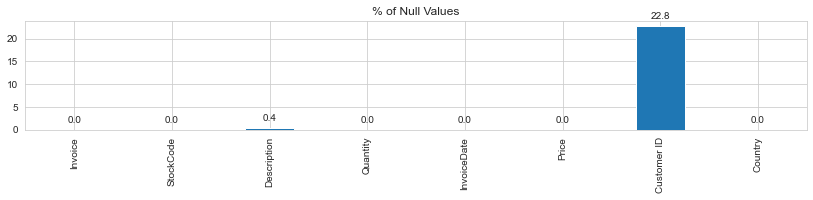

In [13]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

fig,ax = plt.subplots(figsize=(14,2))
((df.isnull().sum() / len(df))*100).plot.bar(ax=ax)
add_value_labels(ax)
ax.set_title('% of Null Values')
plt.show()

We can see that there are missing values in Description and CustomerID. About 25% of missing values are in CustomerID and 0.3% of values are missing in Description. 

## Remove rows with missing values

While looking at the number of null values in the dataframe, it is interesting to note that about 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. Therefore it is necessary to remove them from the current dataset.

In [14]:
# df_new without missing values
df_new = df.dropna()

In [15]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Country        0
Customer ID    0
Price          0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
Invoice        0
dtype: int64

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


By removing these entries we end up with a dataframe filled at 100% for all variables!

In [17]:
df_new = df_new.rename(columns={"Customer ID" : "CustomerID", "Invoice": "InvoiceNo", "Price": "UnitPrice"})

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   UnitPrice    824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [19]:
# change columns tyoe - String to Int type 
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

In [20]:
df_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2009-12-01 07:45:00       6.95       13085  United Kingdom  
1 2009-12-01 07:45:00       6.75       13085  United Kingdom  
2 2009-12-01 07:45:00       6.75       13085  United Kingdom  
3 2009-12-01 07:45:00       2.10       13085  United Kingdom  
4 2009-12-01 07:45:00       1.25       13085  United Kingdom

In [21]:
df_new.describe().round(2)

Quantity  UnitPrice  CustomerID
count  824364.00  824364.00   824364.00
mean       12.41       3.68    15324.64
std       188.98      70.24     1697.46
min    -80995.00       0.00    12346.00
25%         2.00       1.25    13975.00
50%         5.00       1.95    15255.00
75%        12.00       3.75    16797.00
max     80995.00   38970.00    18287.00

## Remove Quantity with negative values

These are relative to orders that have been cancelled. They are indicated by an InvoiceNo with a C at the beginning of the code.

In [22]:
temp = df_new.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

CustomerID InvoiceNo  Number of products
0       12346    491725                   1
1       12346    491742                   1
2       12346    491744                   1
3       12346    492718                   1
4       12346    492722                   1
5       12346    493410                   1
6       12346    493412                   1
7       12346    494450                   1
8       12346    495295                   1
9       12346    499763                   5

In [23]:
df_new = df_new[df_new['Quantity'] > 0]

In [24]:
df_new.describe().round(2)

Quantity  UnitPrice  CustomerID
count  805620.00  805620.00   805620.00
mean       13.31       3.21    15331.86
std       144.31      29.20     1696.77
min         1.00       0.00    12346.00
25%         2.00       1.25    13982.00
50%         5.00       1.95    15271.00
75%        12.00       3.75    16805.00
max     80995.00   10953.50    18287.00

Before removing negativa values we had 406.829, after 397.924, therefore 8.905 transaction have been cancelled.

## Remove duplicate values

A row is duplicate if all the entries are equal to the entries of another (or more than one) row.

In [25]:
print('Duplicate entries: {}'.format(df_new.duplicated().sum()))
df_new.drop_duplicates(inplace = True)

Duplicate entries: 26125


# Features Generation

## Creating product StockCode Lookup

We can see Description not only tells what the product is but in some cases it is either corrupted by vague values or describes the condition of product (for eg. "wet/rusty"). We can create a product lookup which can tell us a good idea what product a specific StockCode indicates to.

In [26]:
# LOGIC: Description with max upper case letters = Product Name

def get_product_name(x):
    max_upper_count = 0
    product_name = ''
    for i in x:
        if(i==i):  #To Check for NaN
            count = 0
            for letter in i:
                if(letter.isupper()):
                    count = count+1
            if count>max_upper_count:
                max_upper_count = count
                product_name = i
    return product_name

In [27]:
grouped = df_new.groupby("StockCode")['Description'].unique()
lookup = grouped.apply(get_product_name)
# lookup.to_excel('lookup_product_stockCode.xlsx')

In [28]:
grouped.head()

StockCode
10002     [INFLATABLE POLITICAL GLOBE ]
10080        [GROOVY CACTUS INFLATABLE]
10109            [BENDY COLOUR PENCILS]
10120                    [DOGGY RUBBER]
10123C          [HEARTS WRAPPING TAPE ]
Name: Description, dtype: object

In [29]:
lookup.head()

StockCode
10002     INFLATABLE POLITICAL GLOBE 
10080        GROOVY CACTUS INFLATABLE
10109            BENDY COLOUR PENCILS
10120                    DOGGY RUBBER
10123C          HEARTS WRAPPING TAPE 
Name: Description, dtype: object

## Feature Generation: TotalPrice

In [30]:
df_new['TotalPrice'] = df_new['Quantity'] * df_new['UnitPrice']

In [31]:
#TODO
# rearrange all the columns for easy reference
#df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   UnitPrice    779495 non-null  float64       
 6   CustomerID   779495 non-null  int64         
 7   Country      779495 non-null  object        
 8   TotalPrice   779495 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 59.5+ MB


In [33]:
df_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2009-12-01 07:45:00       6.95       13085  United Kingdom        83.4  
1 2009-12-01 07:45:00       6.75       13085  United Kingdom        81.0  
2 2009-12-01 07:45:00       6.75       13085  United Kingdom        81.0  
3 2009-12-01 07:45:00       2.10       13085  United Kingdom       100.8  
4 2009-12-01 07:45:00       1.25       13085  United Kingdom        30.0

## Features Generation: Month, Day and Hour for the invoice

In [34]:
df_new.insert(loc=2, column='Year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='Month', value=df_new['InvoiceDate'].dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='Day', value=(df_new['InvoiceDate'].dt.dayofweek)+1)
df_new.insert(loc=5, column='Hour', value=df_new['InvoiceDate'].dt.hour)

In [35]:
df_new.head()

InvoiceNo StockCode  Year_month  Month  Day  Hour  \
0    489434     85048      200912     12    2     7   
1    489434    79323P      200912     12    2     7   
2    489434    79323W      200912     12    2     7   
3    489434     22041      200912     12    2     7   
4    489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   

   UnitPrice  CustomerID         Country  TotalPrice  
0       6.95       13085  United Kingdom        83.4  
1       6.75       13085  United Kingdom        81.0  
2       6.75       13085  United Kingdom        81.0  
3       2.10       13085  United Kingdom       100.8  
4       1.25       13085  United Kingdom        30.0

## Feature Generation: ProductName

In [36]:
df_new = df_new.join(other=lookup, on='StockCode', how='left', rsuffix='ProductName')
df_new = df_new.rename(columns={'DescriptionProductName':'ProductName'})

In [37]:
# GETTING SIMILARITY BETWEEN THE Description AND ProductName
# !pip install jellyfish
# import jellyfish
from difflib import SequenceMatcher

des = df_new['Description']
prod = df_new['ProductName']
dist = []
for d,p in zip(des, prod):
    try:
        dist.append(SequenceMatcher(None,d,p).ratio())
#         dist.append(float(jellyfish.damerau_levenshtein_distance(d,p)))
    except:
        dist.append(0)

In [38]:
df_new['dist'] = dist  # dist is the difference between description and product name
df_new[(df_new['dist']<0.5)&(df_new['dist']!=0)][['StockCode','Description','ProductName','dist']]

StockCode                          Description  \
242         82486    WOOD S/3 CABINET ANT WHITE FINISH   
304        84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
305        84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
358        84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
377        84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
378        84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
558        84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
559        84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
560        84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
686         82486    WOOD S/3 CABINET ANT WHITE FINISH   
1039       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
1148       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
1149       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
1150       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
1151       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
1213        82486    WOOD S/3 CABINET ANT WHITE FINISH   
1540       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
1541       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
1646       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
1647       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
3240       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
3241       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
3600       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
3601       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
3602       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
3603       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
3845       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
3846       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
4012       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
4075        82486    WOOD S/3 CABINET ANT WHITE FINISH   
4921        82486    WOOD S/3 CABINET ANT WHITE FINISH   
6238       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
6239       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
6727       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
6728       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
6729       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
6848       84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
6849       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
6850       84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
6970        82486    WOOD S/3 CABINET ANT WHITE FINISH   
7030       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
7031       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
7721        82486    WOOD S/3 CABINET ANT WHITE FINISH   
8728        82486    WOOD S/3 CABINET ANT WHITE FINISH   
8736        82486    WOOD S/3 CABINET ANT WHITE FINISH   
9242        82486    WOOD S/3 CABINET ANT WHITE FINISH   
9273        22323               PINK POLKADOT KIDS BAG   
9625       84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
9626       84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
9659        22323               PINK POLKADOT KIDS BAG   
9660        22324               BLUE POLKADOT KIDS BAG   
10293      84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
10294      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
10295      84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
10296      84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
10306       82486    WOOD S/3 CABINET ANT WHITE FINISH   
10714      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
10715      84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
10865      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
10906      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
11080      84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
11089      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
11252      84997C   BLUE 3 PIECE MINI DOTS CUTLERY SET   
11253      84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
11254      84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
11450      84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET   
11451      84997D   PINK 3 PIECE MINI DOTS CUTLERY SET   
11461      84997B    RED 3 PIECE MINI DOTS CUTLERY SET   
11529 

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 1067370
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Year_month   779495 non-null  int64         
 3   Month        779495 non-null  int64         
 4   Day          779495 non-null  int64         
 5   Hour         779495 non-null  int64         
 6   Description  779495 non-null  object        
 7   Quantity     779495 non-null  int64         
 8   InvoiceDate  779495 non-null  datetime64[ns]
 9   UnitPrice    779495 non-null  float64       
 10  CustomerID   779495 non-null  int64         
 11  Country      779495 non-null  object        
 12  TotalPrice   779495 non-null  float64       
 13  ProductName  779495 non-null  object        
 14  dist         779495 non-null  float64       
dtypes: datetime64[ns](1), float64(3),

In [40]:
df_new.head()

InvoiceNo StockCode  Year_month  Month  Day  Hour  \
0    489434     85048      200912     12    2     7   
1    489434    79323P      200912     12    2     7   
2    489434    79323W      200912     12    2     7   
3    489434     22041      200912     12    2     7   
4    489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   

   UnitPrice  CustomerID         Country  TotalPrice  \
0       6.95       13085  United Kingdom        83.4   
1       6.75       13085  United Kingdom        81.0   
2       6.75       13085  United Kingdom        81.0   
3       2.10       13085  United Kingdom       100.8   
4       1.25       13085  United Kingdom        30.0   

                           ProductName  dist  
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS   1.0  
1                   PINK CHERRY LIGHTS   1.0  
2                  WHITE CHERRY LIGHTS   1.0  
3         RECORD FRAME 7" SINGLE SIZE    1.0  
4       STRAWBERRY CERAMIC TRINKET BOX   1.0

In [41]:
df_new.describe()

Year_month          Month            Day           Hour  \
count  779495.000000  779495.000000  779495.000000  779495.000000   
mean   201050.622134       7.417110       3.641677      12.791910   
std        56.526682       3.422346       1.951132       2.294191   
min    200912.000000       1.000000       1.000000       6.000000   
25%    201007.000000       5.000000       2.000000      11.000000   
50%    201012.000000       8.000000       3.000000      13.000000   
75%    201108.000000      11.000000       5.000000      14.000000   
max    201112.000000      12.000000       7.000000      20.000000   

            Quantity      UnitPrice     CustomerID     TotalPrice  \
count  779495.000000  779495.000000  779495.000000  779495.000000   
mean       13.507085       3.218199   15320.262918      22.289821   
std       146.540284      29.674823    1695.722988     227.416962   
min         1.000000       0.000000   12346.000000       0.000000   
25%         2.000000       1.250000   13971.000000       4.950000   
50%         6.000000       1.950000   15246.000000      12.480000   
75%        12.000000       3.750000   16794.000000      19.800000   
max     80995.000000   10953.500000   18287.000000  168469.600000   

                dist  
count  779495.000000  
mean        0.978769  
std         0.080540  
min         0.192308  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

### Save cleaned dataframe on a file

In [53]:
df_new.to_csv(path_or_buf="../dataset/Online_Retail_II/data_cleaned.csv", encoding = 'ISO-8859-1', index = False)

# Exploratory Data Analysis (EDA)

___
## Exploring the content of the variables

This dataframe contains 8 variables that correspond to: 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  <br>
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. Nominal. <br>
**Quantity**: The quantities of each product (item) per transaction. Numeric.	<br>
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling. <br>
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. Nominal, the name of the country where each customer resides.<br>

___

In [57]:
df_new.shape

(779495, 15)

## How many customers?

In [56]:
df_new['CustomerID'].unique().shape

(5881,)

## How many orders made by the customers?

In [59]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

CustomerID         Country  InvoiceNo
0       12346  United Kingdom         34
1       12347         Iceland        222
2       12348         Finland         51
3       12349           Italy        175
4       12350          Norway         17

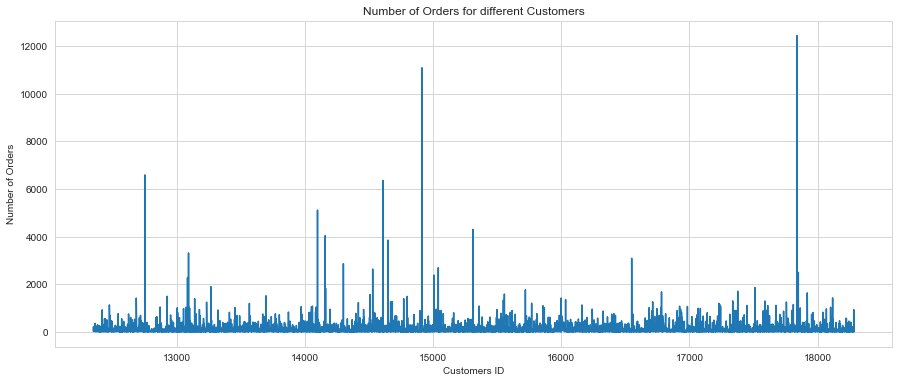

In [61]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['CustomerID'], orders['InvoiceNo'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders

In [62]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


CustomerID         Country  InvoiceNo
5449       17841  United Kingdom      12435
2554       14911            EIRE      11079
413        12748  United Kingdom       6587
2252       14606  United Kingdom       6359
1745       14096  United Kingdom       5111

## How much money spent by the customers?

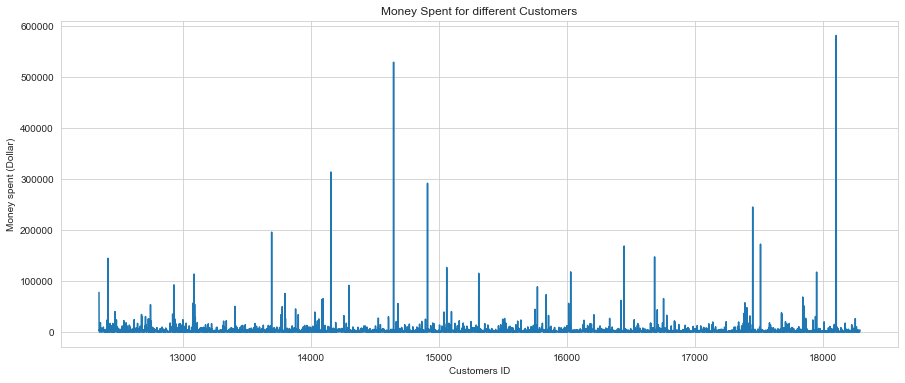

In [63]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['TotalPrice'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent['CustomerID'], money_spent['TotalPrice'])
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent

In [64]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='TotalPrice', ascending=False).head()

The TOP 5 customers with highest money spent...


CustomerID         Country  TotalPrice
5708       18102  United Kingdom   580987.04
2292       14646     Netherlands   528602.52
1804       14156            EIRE   313437.62
2554       14911            EIRE   291420.81
5066       17450  United Kingdom   244784.25

In [66]:
money_spent.describe()

CustomerID     TotalPrice
count   5894.000000    5894.000000
mean   15308.390906    2947.879923
std     1718.747894   14421.499410
min    12346.000000       0.000000
25%    13823.250000     341.750000
50%    15306.500000     861.595000
75%    16793.750000    2247.170000
max    18287.000000  580987.040000

# Discover patterns for Number of Orders
Credit: https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

## How many orders (per month)?

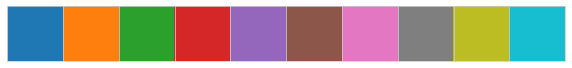

In [67]:
# color available
sns.palplot(color)

In [68]:
df_new.head()

InvoiceNo StockCode  Year_month  Month  Day  Hour  \
0    489434     85048      200912     12    2     7   
1    489434    79323P      200912     12    2     7   
2    489434    79323W      200912     12    2     7   
3    489434     22041      200912     12    2     7   
4    489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   

   UnitPrice  CustomerID         Country  TotalPrice  \
0       6.95       13085  United Kingdom        83.4   
1       6.75       13085  United Kingdom        81.0   
2       6.75       13085  United Kingdom        81.0   
3       2.10       13085  United Kingdom       100.8   
4       1.25       13085  United Kingdom        30.0   

                           ProductName  dist  
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS   1.0  
1                   PINK CHERRY LIGHTS   1.0  
2                  WHITE CHERRY LIGHTS   1.0  
3         RECORD FRAME 7" SINGLE SIZE    1.0  
4       STRAWBERRY CERAMIC TRINKET BOX   1.0

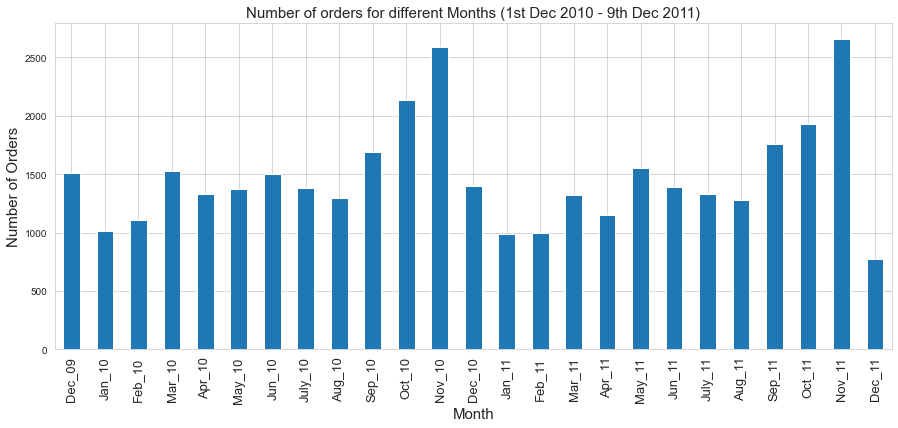

In [72]:
ax = df_new.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10',     'Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='vertical', fontsize=13)
plt.show()

## How many orders (per day)?

In [77]:
df_new['Day'].unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [78]:
res_day = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()
pd.DataFrame(data=res_day)

Day
[1]  5755
[2]  6628
[3]  6649
[4]  7774
[5]  5391
[6]    30
[7]  4748

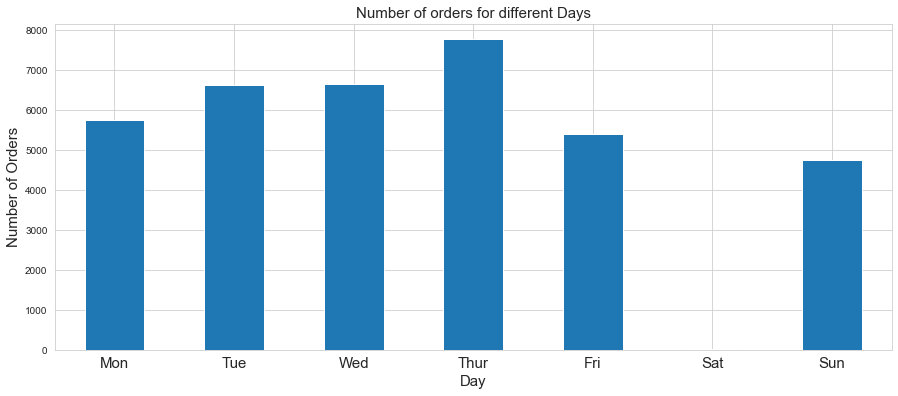

In [76]:
ax = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat', 'Sun'), rotation='horizontal', fontsize=15)
plt.show()

 ## How many orders (per hour)?


In [79]:
res_hour = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()
pd.DataFrame(data=res_hour).head()

Hour
[6]      1
[7]     76
[8]    979
[9]   2549
[10]  4364

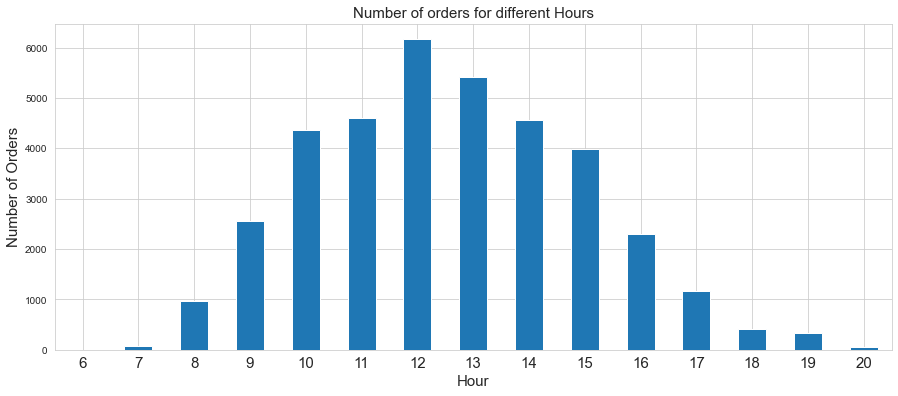

In [80]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

Results (summarized by the following plots): 
- It is interesting to note that Thursdays have the maximum sale by volume and as well as revenue.
- Also, there are no transactions done on Saturdays. It is safe to assume that the store is closed on Saturdays.
- Nearly, 42% of total sale is done on Thursdays and Tuesdays

- We can see that the customers do tend to buy between 9:00 hrs - 13:00 hrs. Infact, ~51 % of the sales by revenue is done in these hours
- Also, there are no transactions are done before 6:00 hrs and after 20:00 hrs. It can be assumed that the store usually opens for 14 hours between 6:00 hrs and 20:00 hrs.

- It is evident that there is increase in sales by both volume and revenue in the fourth quarter of the year 2011.
- There is major sale in the month of November and December.
- It could be because of Holiday season.

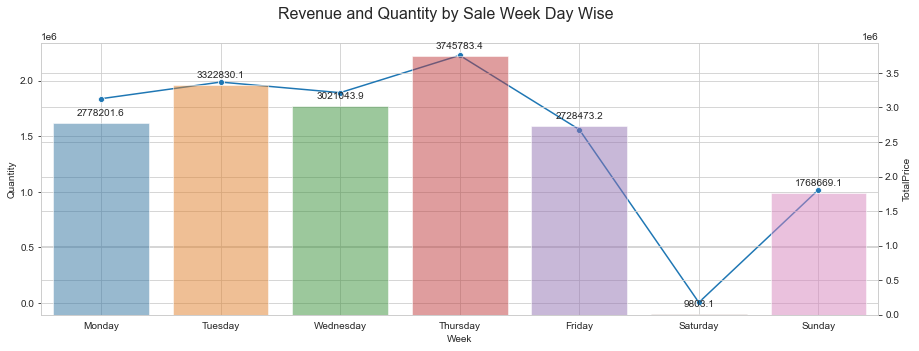

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.set_style("whitegrid")

week = df_new[df_new['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
week = week.groupby(week['InvoiceDate'].dt.weekday)[['TotalPrice','Quantity']].sum()
week = week.reset_index()
week['Week'] = week['InvoiceDate'].apply(lambda x: calendar.day_name[x])

sns.lineplot(data = week, x=week.Week, y='Quantity', marker='o', sort = False, ax=ax)
ax2 = ax.twinx()
sns.barplot(data = week, x=week.Week, y='TotalPrice', alpha=0.5, ax=ax2)
fig.suptitle('Revenue and Quantity by Sale Week Day Wise',fontsize=16)
add_value_labels(ax2)

plt.show()

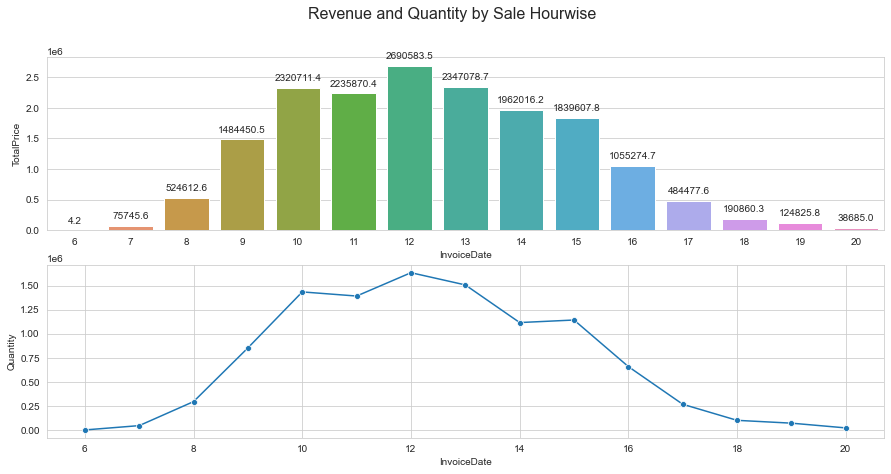

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

day = df_new[df_new['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
day = day.groupby(day['InvoiceDate'].dt.hour)[['TotalPrice','Quantity']].sum()

sns.barplot(data = day, x=day.index, y='TotalPrice', alpha=1, ax=ax[0])
sns.lineplot(data = day, x=day.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Hourwise',fontsize=16)
add_value_labels(ax[0])
plt.show()

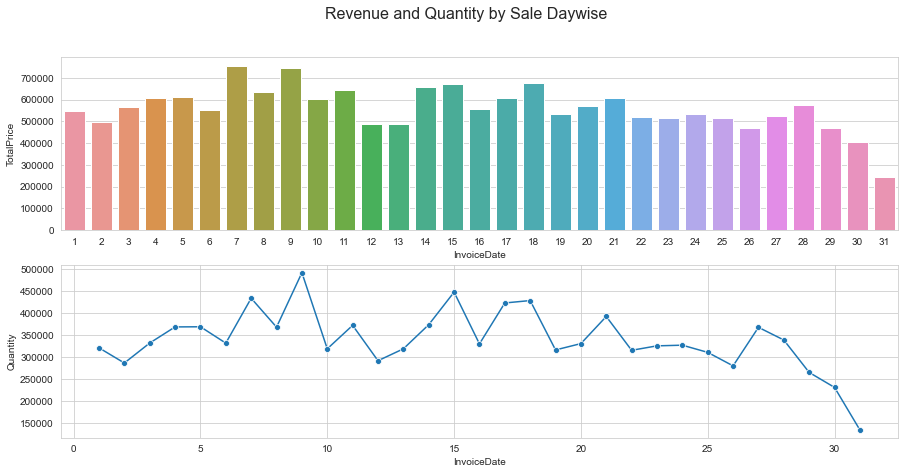

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

date = df_new[df_new['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
date = date.groupby(date['InvoiceDate'].dt.day)[['TotalPrice','Quantity']].sum()

sns.barplot(data = date, x=date.index, y='TotalPrice', alpha=1, ax=ax[0])
sns.lineplot(data = date, x=date.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Daywise',fontsize=16)

plt.show()

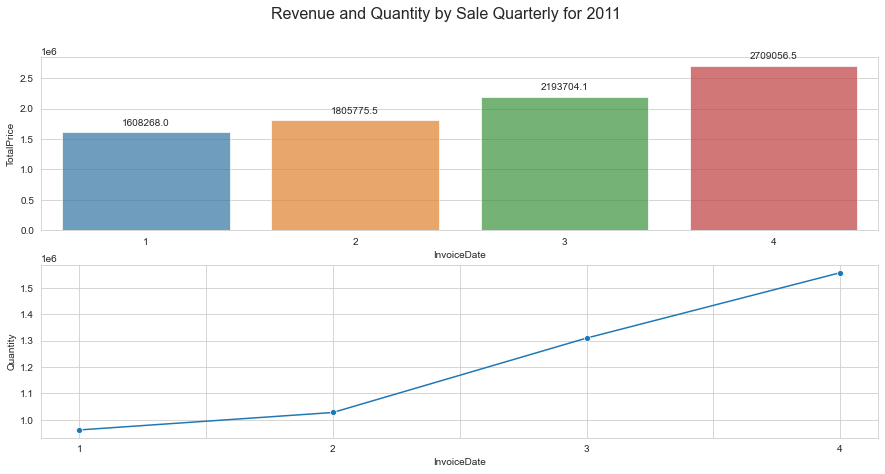

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
sns.set_style("whitegrid")

q = df_new[(df_new['TotalPrice']>=0)&(df_new['InvoiceDate'].dt.year==2011)][['InvoiceDate','TotalPrice','Quantity']]
q = q.groupby(q['InvoiceDate'].dt.quarter)[['TotalPrice','Quantity']].sum()

sns.barplot(data = q, x=q.index, y='TotalPrice', alpha=0.7, ax=ax[0])
sns.lineplot(data = q, x=q.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Quarterly for 2011',fontsize=16)
add_value_labels(ax[0])
ax[1].set_xticklabels(['',1,'',2,'',3,'',4])
plt.show()

### Customers and Products
The dataframe contains $\sim$400,000 entries. We can see a summary of customers and products:

In [41]:
pd.DataFrame([{'products': len(df_new['StockCode'].value_counts()),    
               'transactions': len(df_new['InvoiceNo'].value_counts()),
               'customers': len(df_new['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity      4631         36975       5881

It can be seen that the data concern 5.881 users and that they bought 4.631 different products. The total number of transactions carried out is of the order of $\sim$35'000.

Now we can determine the number of products purchased in every transaction:

In [42]:
temp = df_new.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

CustomerID InvoiceNo  Number of products
0       12346    491725                   1
1       12346    491742                   1
2       12346    491744                   1
3       12346    492718                   1
4       12346    492722                   1
5       12346    493410                   1
6       12346    493412                   1
7       12346    494450                   1
8       12346    495295                   1
9       12346    499763                   5

In [43]:
nb_products_per_basket.describe()

CustomerID  Number of products
count  36975.000000        36975.000000
mean   15298.058364           21.081677
std     1721.211549           22.964145
min    12346.000000            1.000000
25%    13802.000000            6.000000
50%    15218.000000           15.000000
75%    16791.000000           27.000000
max    18287.000000          542.000000

In [44]:
# Number of transactions made by each customer
temp = nb_products_per_basket.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
trans_per_customer = temp.rename(columns = {'InvoiceNo':'Number of transactions'})
trans_per_customer[:10].sort_values('Number of transactions')

CustomerID  Number of transactions
4       12350                       1
5       12351                       1
8       12354                       1
7       12353                       2
9       12355                       2
3       12349                       4
2       12348                       5
1       12347                       8
6       12352                      10
0       12346                      12

In [45]:
trans_per_customer.shape

(5881, 2)

In [46]:
trans_per_customer.describe()

CustomerID  Number of transactions
count   5881.000000             5881.000000
mean   15314.674205                6.287196
std     1715.429759               13.012879
min    12346.000000                1.000000
25%    13833.000000                1.000000
50%    15313.000000                3.000000
75%    16797.000000                7.000000
max    18287.000000              398.000000

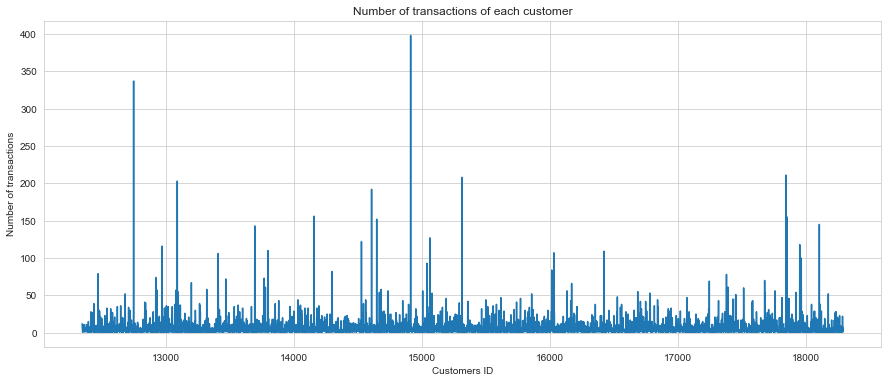

In [55]:
# plot the number of products per customer
plt.subplots(figsize=(15,6))
plt.plot(trans_per_customer['CustomerID'], trans_per_customer['Number of transactions'])
plt.xlabel('Customers ID')
plt.ylabel('Number of transactions')
plt.title('Number of transactions of each customer')
plt.show()

In [47]:
# counts the number of customer for each total number of transactions
no_customer_per_tot_transaction = trans_per_customer['Number of transactions'].value_counts()
no_customer_per_tot_transaction = no_customer_per_tot_transaction.sort_index()

In [48]:
no_customer_per_tot_transaction.shape

(90,)

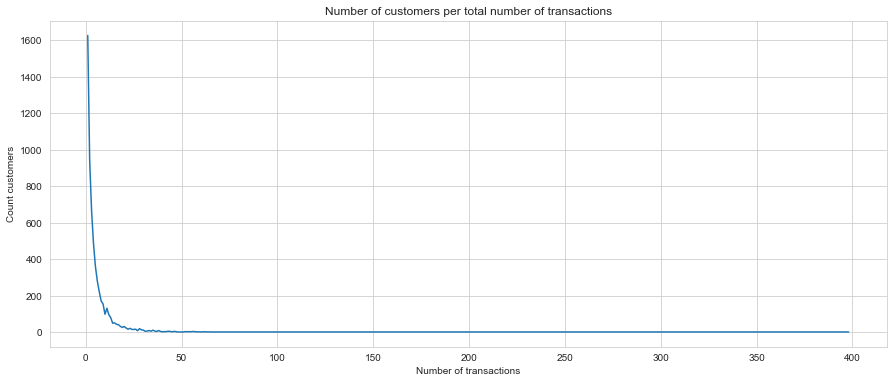

In [72]:
plt.subplots(figsize=(15,6))
plt.plot(no_customer_per_tot_transaction.index, no_customer_per_tot_transaction)
plt.xlabel('Number of transactions')
plt.ylabel('Count customers')
plt.title('Number of customers per total number of transactions')
plt.show()

In [49]:
# Number of items in each transaction
temp = nb_products_per_basket.groupby(by=['InvoiceNo'], as_index=False)['Number of products'].sum()
items_per_invoice = temp.rename(columns = {'Number of products':'Number of items'})
items_per_invoice[:10].sort_values('InvoiceNo')

InvoiceNo  Number of items
0    489434                8
1    489435                4
2    489436               19
3    489437               23
4    489438               17
5    489439               19
6    489440                2
7    489441                4
8    489442               23
9    489443                7

In [50]:
items_per_invoice.shape

(36975, 2)

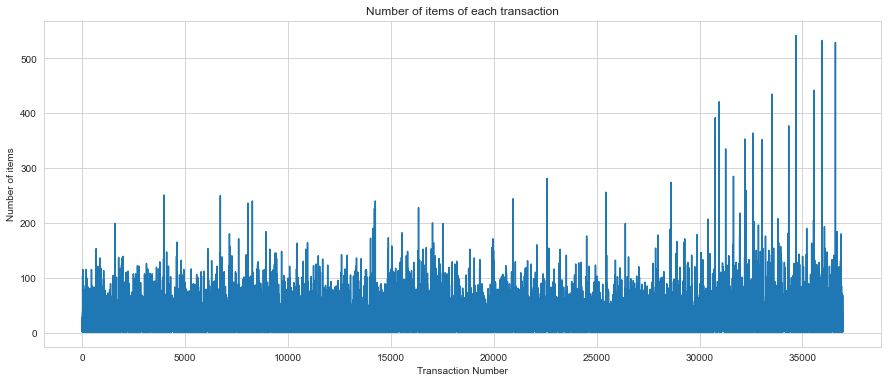

In [82]:
# plot the number of items in each transaction
plt.subplots(figsize=(15,6))
plt.plot(items_per_invoice.index, items_per_invoice['Number of items'])
plt.xlabel('Transaction Number')
plt.ylabel('Number of items')
plt.title('Number of items of each transaction')
plt.show()

In [51]:
# counts the number of customer for each total number of transactions
no_trans_per_tot_items = items_per_invoice['Number of items'].value_counts()
no_trans_per_tot_items = no_trans_per_tot_items.sort_index()

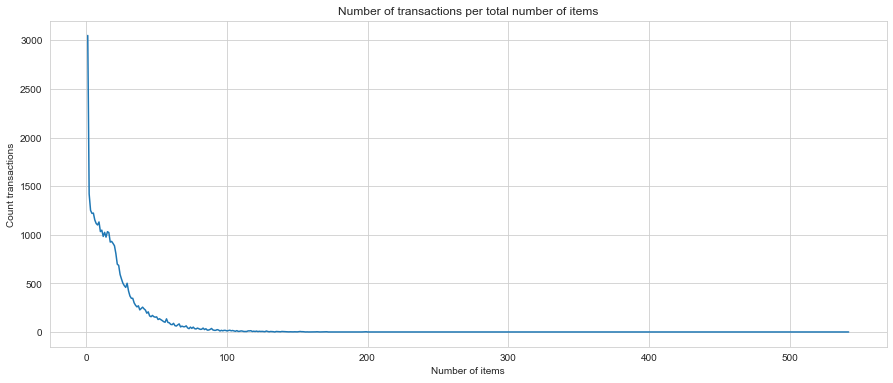

In [84]:
plt.subplots(figsize=(15,6))
plt.plot(no_trans_per_tot_items.index, no_trans_per_tot_items)
plt.xlabel('Number of items')
plt.ylabel('Count transactions')
plt.title('Number of transactions per total number of items')
plt.show()

The first lines of this list shows several things worthy of interest:
- the existence of entries with the prefix C for the **InvoiceNo** variable: this indicates transactions that have been canceled
- the existence of users who only came once and only purchased one product (e.g. nº12346)
- the existence of frequent users that buy a large number of items at each order

___

In [52]:
# COUNT DAYS FROM THE LAST TRANSACTION
refrence_date = df_new.InvoiceDate.max() + datetime.timedelta(days = 1)
df_new["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print('Reference Date:', refrence_date)
df_new['days_since_last_purchase'] = (refrence_date - df_new.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  df_new[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
#customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
#customer_history_df = customer_history_df.sort_values(by='days_since_last_purchase')
customer_history_df

Reference Date: 2011-12-10 12:50:00


CustomerID  days_since_last_purchase
0          12346                     326.0
1          12347                       2.0
2          12348                      75.0
3          12349                      19.0
4          12350                     310.0
5          12351                     375.0
6          12352                      36.0
7          12353                     204.0
8          12354                     232.0
9          12355                     214.0
10         12356                      23.0
11         12357                      33.0
12         12358                       2.0
13         12359                      58.0
14         12360                      52.0
15         12361                     287.0
16         12362                       3.0
17         12363                     110.0
18         12364                       8.0
19         12365                     291.0
20         12366                     634.0
21         12367                       4.0
22         12368                     628.0
23         12369                     413.0
24         12370                      51.0
25         12371                      45.0
26         12372                      72.0
27         12373                     311.0
28         12374                      25.0
29         12375                      11.0
30         12376                     390.0
31         12377                     315.0
32         12378                     130.0
33         12379                      82.0
34         12380                      22.0
35         12381                       5.0
36         12383                     185.0
37         12384                      29.0
38         12385                     379.0
39         12386                     338.0
40         12387                     415.0
41         12388                      16.0
42         12389                     403.0
43         12390                      80.0
44         12391                      22.0
45         12392                     591.0
46         12393                      72.0
47         12394                      64.0
48         12395                      19.0
49         12396                     674.0
50         12397                      36.0
51         12398                      46.0
52         12399                     119.0
53         12400                     414.0
54         12401                     303.0
55         12402                     323.0
56         12403                      50.0
57         12404                     682.0
58         12405                     149.0
59         12406                      22.0
60         12407                      50.0
61         12408                      33.0
62         12409                      79.0
63         12410                     309.0
64         12411                     410.0
65         12412                      75.0
66         12413                      67.0
67         12414                     217.0
68         12415                      24.0
69         12416                     657.0
70         12417                       3.0
71         12418                     113.0
72         12419                     386.0
73         12420                      64.0
74         12421                      16.0
75         12422                      96.0
76         12423                       1.0
77         12424                     163.0
78         12425                      78.0
79         12426                     195.0
80         12427                      22.0
81         12428                      26.0
82         12429                       9.0
83         12430                      43.0
84         12431                      36.0
85         12432                      43.0
86         12433                       1.0
87         12434                      85.0
88         12435                      80.0
89         12436                     100.0
90         12437                       2.0
91         12438                      14.0
92     

In [53]:
customer_history_df.describe()

CustomerID  days_since_last_purchase
count   5881.000000               5881.000000
mean   15314.674205                201.457745
std     1715.429759                209.474135
min    12346.000000                  1.000000
25%    13833.000000                 26.000000
50%    15313.000000                 96.000000
75%    16797.000000                380.000000
max    18287.000000                739.000000

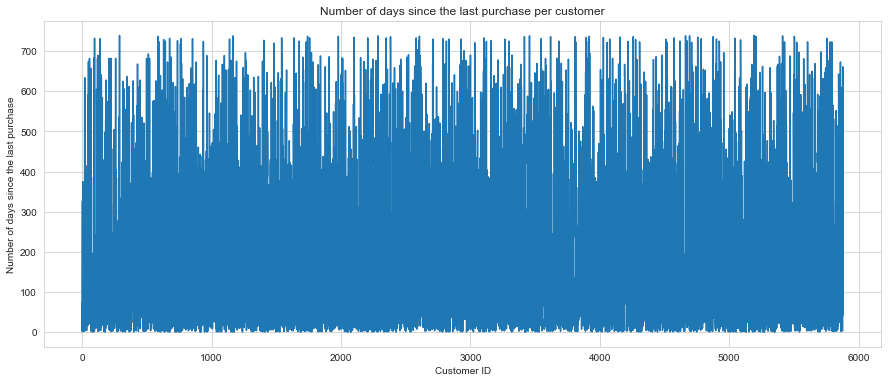

In [96]:
# plot the number of items in each transaction
plt.subplots(figsize=(15,6))
plt.plot(customer_history_df.index, customer_history_df['days_since_last_purchase'])
plt.xlabel('Customer ID')
plt.ylabel('Number of days since the last purchase')
plt.title('Number of days since the last purchase per customer')
plt.show()

In [97]:
# counts the number of customer for each total number of transactions
no_customer_per_num_days = customer_history_df['days_since_last_purchase'].value_counts()
no_customer_per_num_days = no_customer_per_num_days.sort_index()

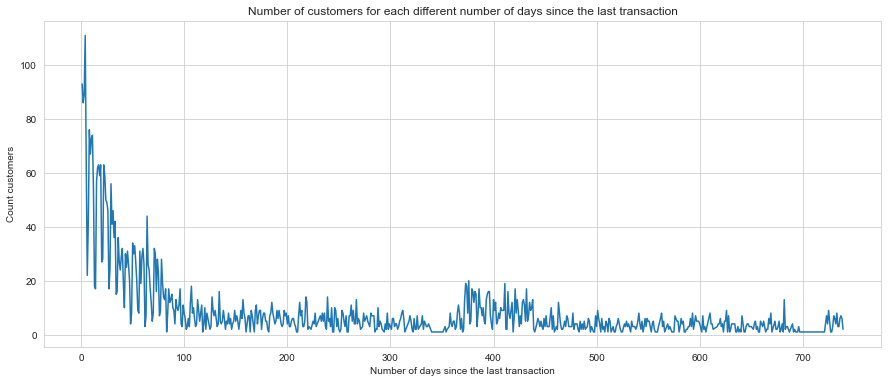

In [99]:
plt.subplots(figsize=(15,6))
plt.plot(no_customer_per_num_days.index, no_customer_per_num_days)
plt.xlabel('Number of days since the last transaction')
plt.ylabel('Count customers')
plt.title('Distribution of customers for each different number of days since the last transaction')
plt.show()

# Discover patterns for Unit Price

In [95]:
df_new['UnitPrice'].describe()

count    779495.000000
mean          3.218199
std          29.674823
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: UnitPrice, dtype: float64

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

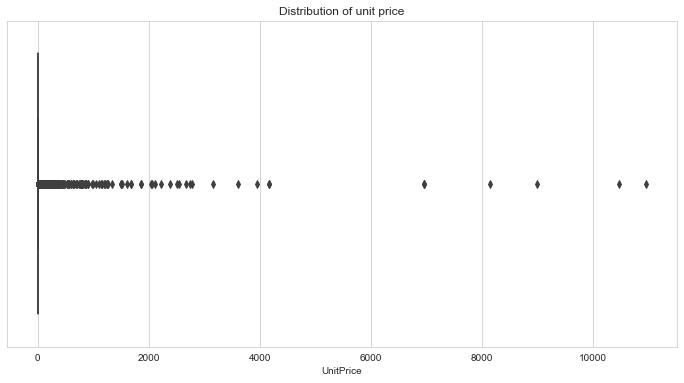

In [99]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new['UnitPrice'])
plt.title("Distribution of unit price")
plt.show()

In [100]:
df_new['UnitPrice'].describe()

count    779495.000000
mean          3.218199
std          29.674823
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: UnitPrice, dtype: float64

In [101]:
df_free = df_new[df_new['UnitPrice'] == 0]

In [102]:
df_free.head()

InvoiceNo StockCode  Year_month  Month  Day  Hour  \
4674     489825     22076      200912     12    3    13   
6781     489998     48185      200912     12    4    11   
16107    490727         M      200912     12    1    16   
18738    490961     22065      200912     12    2    15   
18739    490961     22142      200912     12    2    15   

                          Description  Quantity         InvoiceDate  \
4674               6 RIBBONS EMPIRE          12 2009-12-02 13:34:00   
6781              DOOR MAT FAIRY CAKE         2 2009-12-03 11:19:00   
16107                          Manual         1 2009-12-07 16:38:00   
18738  CHRISTMAS PUDDING TRINKET POT          1 2009-12-08 15:25:00   
18739    CHRISTMAS CRAFT WHITE FAIRY         12 2009-12-08 15:25:00   

       UnitPrice  CustomerID         Country  TotalPrice  \
4674         0.0       16126  United Kingdom         0.0   
6781         0.0       15658  United Kingdom         0.0   
16107        0.0       17231  United Kingdom         0.0   
18738        0.0       14108  United Kingdom         0.0   
18739        0.0       14108  United Kingdom         0.0   

                          ProductName  dist  
4674               6 RIBBONS EMPIRE     1.0  
6781              DOOR MAT FAIRY CAKE   1.0  
16107                          Manual   1.0  
18738  CHRISTMAS PUDDING TRINKET POT    1.0  
18739    CHRISTMAS CRAFT WHITE FAIRY    1.0

In [103]:
df_free['Year_month'].value_counts().sort_index()

200912     7
201001     3
201002     2
201003     1
201004     3
201006     3
201007     1
201008     1
201009     3
201010     2
201011     4
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: Year_month, dtype: int64

In [ ]:
df.describe()

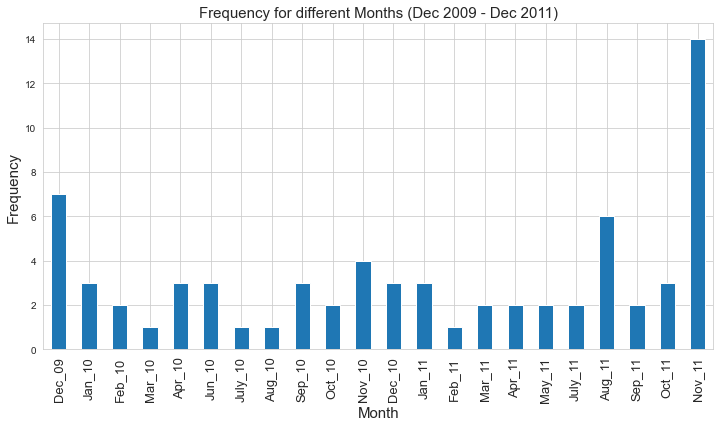

In [108]:
ax = df_free['Year_month'].value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2009 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10', 'Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='vertical', fontsize=13)
plt.show()

**Not clear why there are FREE items given to certain customers**
- On average, the company <span class="mark">gave out 2-4 times FREE items</span> to customers <span class="mark">each month (Except in June 2011)</span>

# Discover patterns for each Country

In [109]:
df_new.head()

InvoiceNo StockCode  Year_month  Month  Day  Hour  \
0    489434     85048      200912     12    2     7   
1    489434    79323P      200912     12    2     7   
2    489434    79323W      200912     12    2     7   
3    489434     22041      200912     12    2     7   
4    489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   

   UnitPrice  CustomerID         Country  TotalPrice  \
0       6.95       13085  United Kingdom        83.4   
1       6.75       13085  United Kingdom        81.0   
2       6.75       13085  United Kingdom        81.0   
3       2.10       13085  United Kingdom       100.8   
4       1.25       13085  United Kingdom        30.0   

                           ProductName  dist  
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS   1.0  
1                   PINK CHERRY LIGHTS   1.0  
2                  WHITE CHERRY LIGHTS   1.0  
3         RECORD FRAME 7" SINGLE SIZE    1.0  
4       STRAWBERRY CERAMIC TRINKET BOX   1.0

## How many country?

In [110]:
temp = df_new[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of different countries: {}'.format(len(countries)))

Number of different countries: 41


### Show results on a colored map

In [111]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

## How many orders for each country?

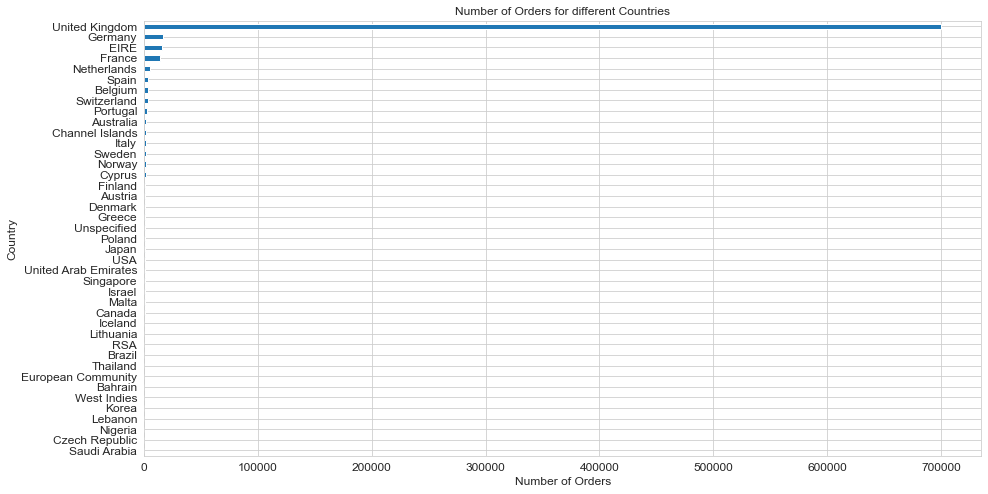

In [113]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

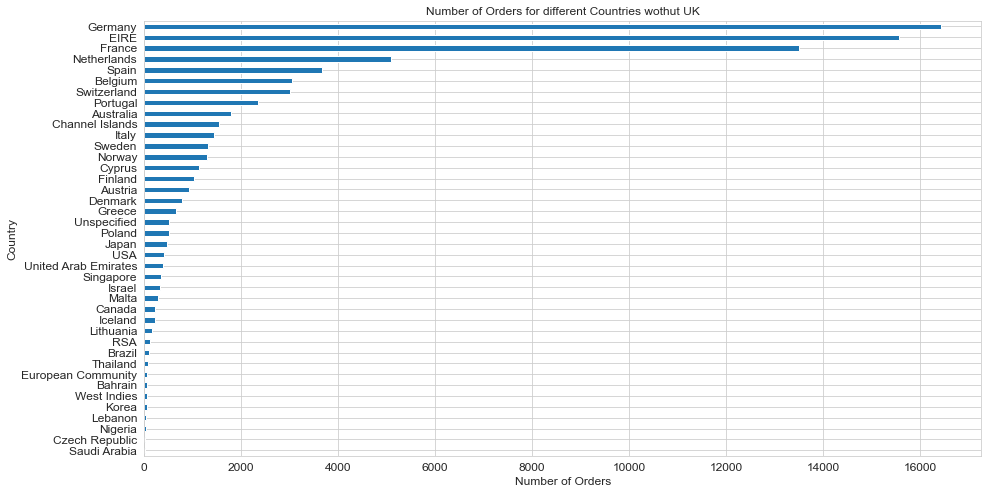

In [115]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries wothut UK', fontsize=12)
plt.show()

## How much money spent by each country?

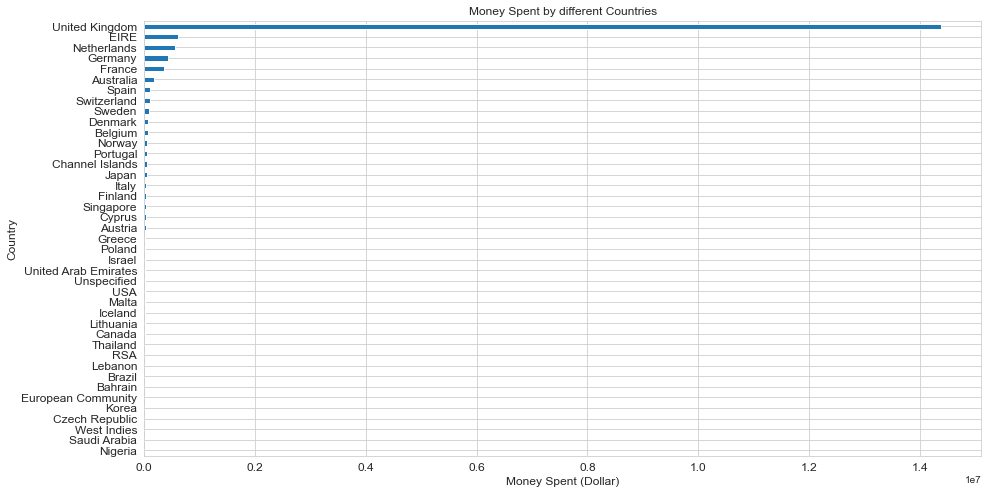

In [116]:
group_country_amount_spent = df_new.groupby('Country')['TotalPrice'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

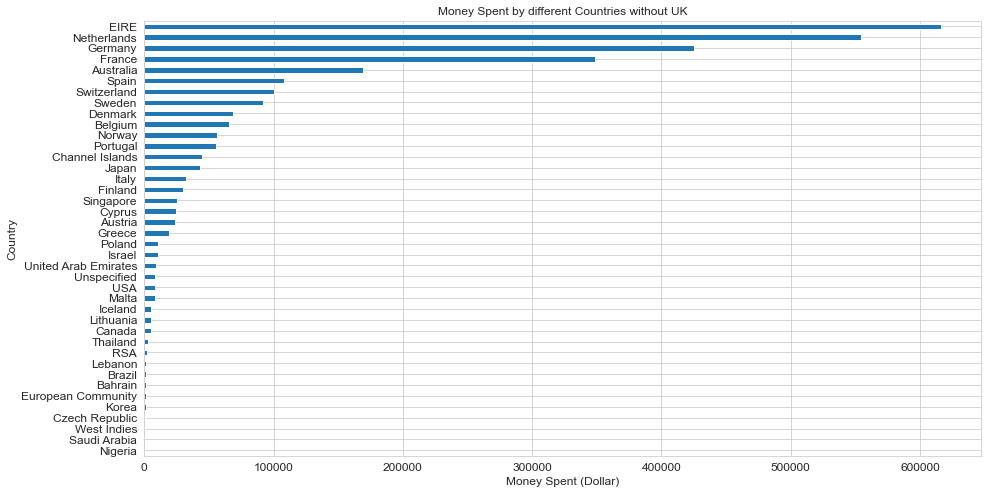

In [117]:
group_country_amount_spent = df_new.groupby('Country')['TotalPrice'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries without UK', fontsize=12)
plt.show()

Plot a summary for revenue, orders and number of customers

In [136]:
reg = df_new[df_new['TotalPrice']>=0].groupby('Country').agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count'})
reg = reg.sort_values(by='TotalPrice', ascending=False)

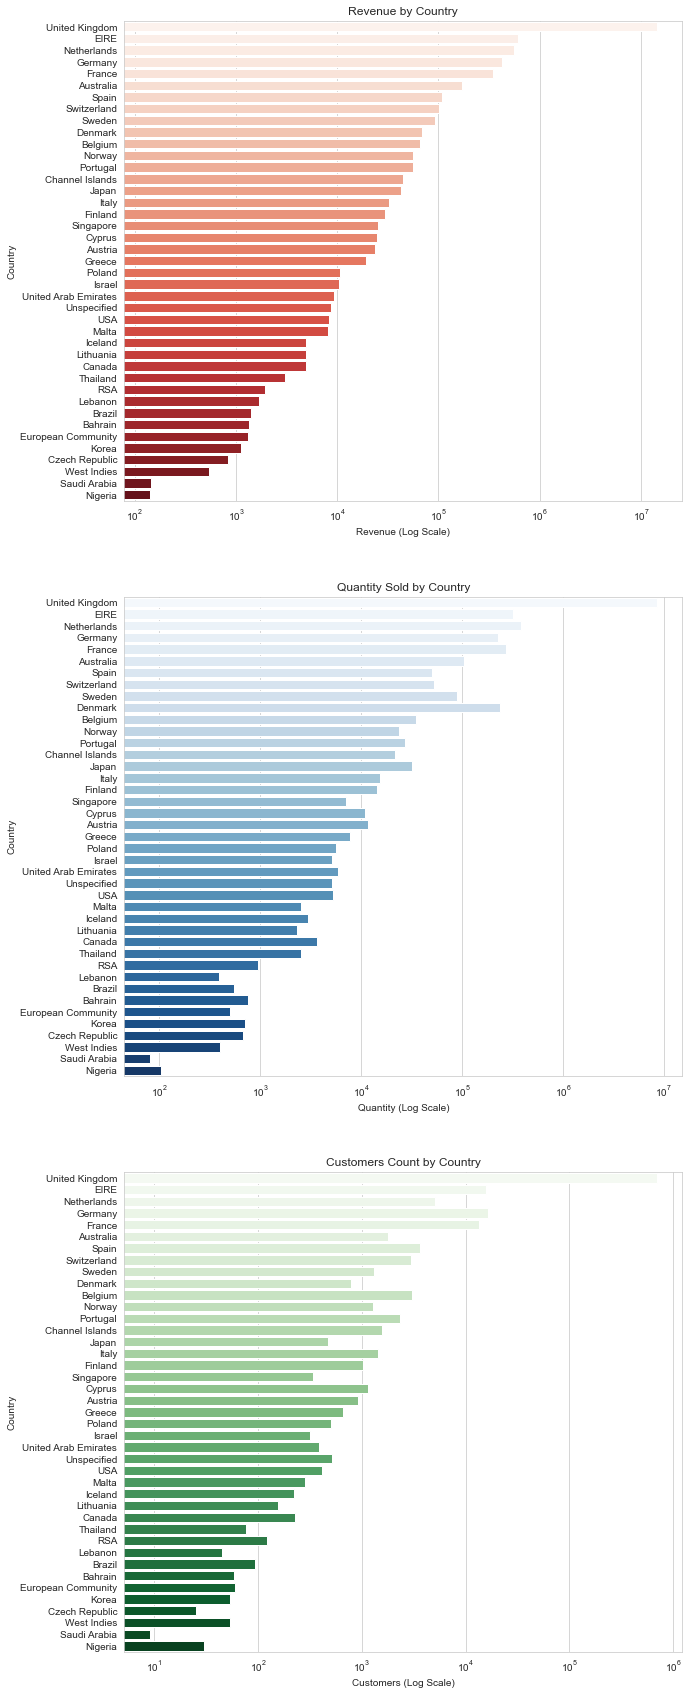

In [137]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
g1 = sns.barplot(x=reg['TotalPrice'], y=reg.index, alpha=1, ax=ax[0],palette='Reds', orient='h')
g2 = sns.barplot(x=reg['Quantity'], y=reg.index, alpha=1, ax=ax[1], palette='Blues',orient='h')
g3 = sns.barplot(x=reg['CustomerID'], y=reg.index, alpha=1, ax=ax[2], palette='Greens', orient='h')
ax[2].title.set_text('Customers Count by Country')
ax[2].set_xlabel("Customers (Log Scale)")
ax[1].title.set_text('Quantity Sold by Country')
ax[1].set_xlabel("Quantity (Log Scale)")
ax[0].title.set_text('Revenue by Country')
ax[0].set_xlabel("Revenue (Log Scale)")
g1.set_xscale("log")
g2.set_xscale("log")
g3.set_xscale("log")
plt.show()

- Major sales is been done from UK (~85%).
- Almost 95% of all the transactions occurring are from Europe

## Analysis of StockCode

Some values of the **StockCode** variable indicate a particular transaction (i.e. D for _Discount_). By checking the content of this variable and by looking for the set of codes that would contain only letters, we get:

In [122]:
list_special_codes = df_new[df_new['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS',
       'ADJUST', 'D', 'ADJUST2', 'SP1002', 'DOT'], dtype=object)

In [123]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_new[df_new['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    ->  Bank Charges                 
TEST001         -> This is a test product.       
TEST002         -> This is a test product.       
PADS            -> PADS TO MATCH ALL CUSHIONS    
ADJUST          -> Adjustment by john on 26/01/2010 16
D               -> Discount                      
ADJUST2         -> Adjustment by Peter on Jun 25 2010 
SP1002          -> KID'S CHALKBOARD/EASEL        
DOT             -> DOTCOM POSTAGE                


We see that there are several types of peculiar transactions, connected e.g. to port charges or bank charges.

Now we can check if each StockCode has a unique Description

In [124]:
x = pd.DataFrame(df_new.groupby("StockCode")["Description"].value_counts())
y = x.droplevel(level=1).index
y = y[y.duplicated()]
test = df_new[["StockCode","Description"]]
test = test.drop_duplicates()
test1 = test[test["StockCode"].isin(y)]
test2 = pd.DataFrame(test1.groupby("StockCode")["Description"].value_counts())
test2.head(10)

Description
StockCode Description                                     
15058A    BLUE POLKADOT GARDEN PARASOL                   1
          BLUE WHITE SPOTS GARDEN PARASOL                1
15058B    PINK POLKADOT GARDEN PARASOL                   1
          PINK WHITE SPOTS GARDEN PARASOL                1
16011      ANIMAL STICKERS                               1
          ANIMAL STICKERS                                1
16012     FOOD/DRINK SPONGE STICKERS                     1
          FOOD/DRINK SPUNGE STICKERS                     1
16151A    FLOWER DES BLUE HANDBAG/ORANG HANDL            1
          FLOWERS HANDBAG blue and orange                1

<AxesSubplot:xlabel='StockCode'>

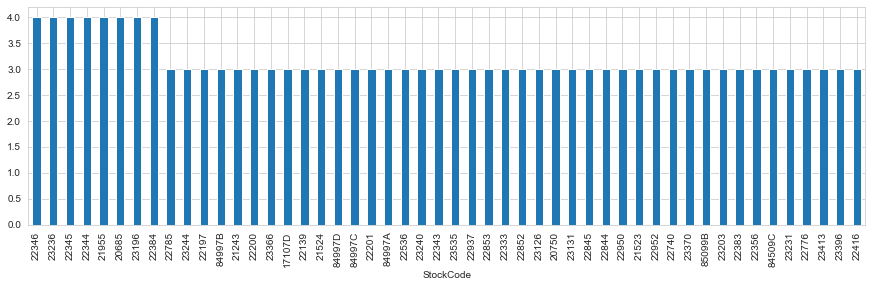

In [125]:
fig, ax = plt.subplots(figsize=(15,4))
grouped = df_new.groupby("StockCode")['Description'].unique()
grouped_counts = grouped.apply(lambda x: len(x)).sort_values(ascending=False)
grouped_counts.head(50).plot.bar(ax=ax)

We can see that there are products which have varied Description but belong to same StockCode For example, for StockCode= 23196, there are 4 unique descriptions

In [126]:
df_new[df_new["StockCode"]=="23196"]["Description"].unique()

array(['RETRO LEAVES MAGNETIC NOTEPAD',
       'RETO LEAVES MAGNETIC SHOPPING LIST',
       'LEAVES MAGNETIC  SHOPPING LIST', 'VINTAGE LEAF MAGNETIC NOTEPAD'],
      dtype=object)

# Discover other patterns

## Is company's performance improving over time?
Company’s performance can be measured in many terms. Here, we will be analysing the performance by:
- Growth in Revenue by Sales
- Growth in Sales Quantity
- Growth in Customer Base

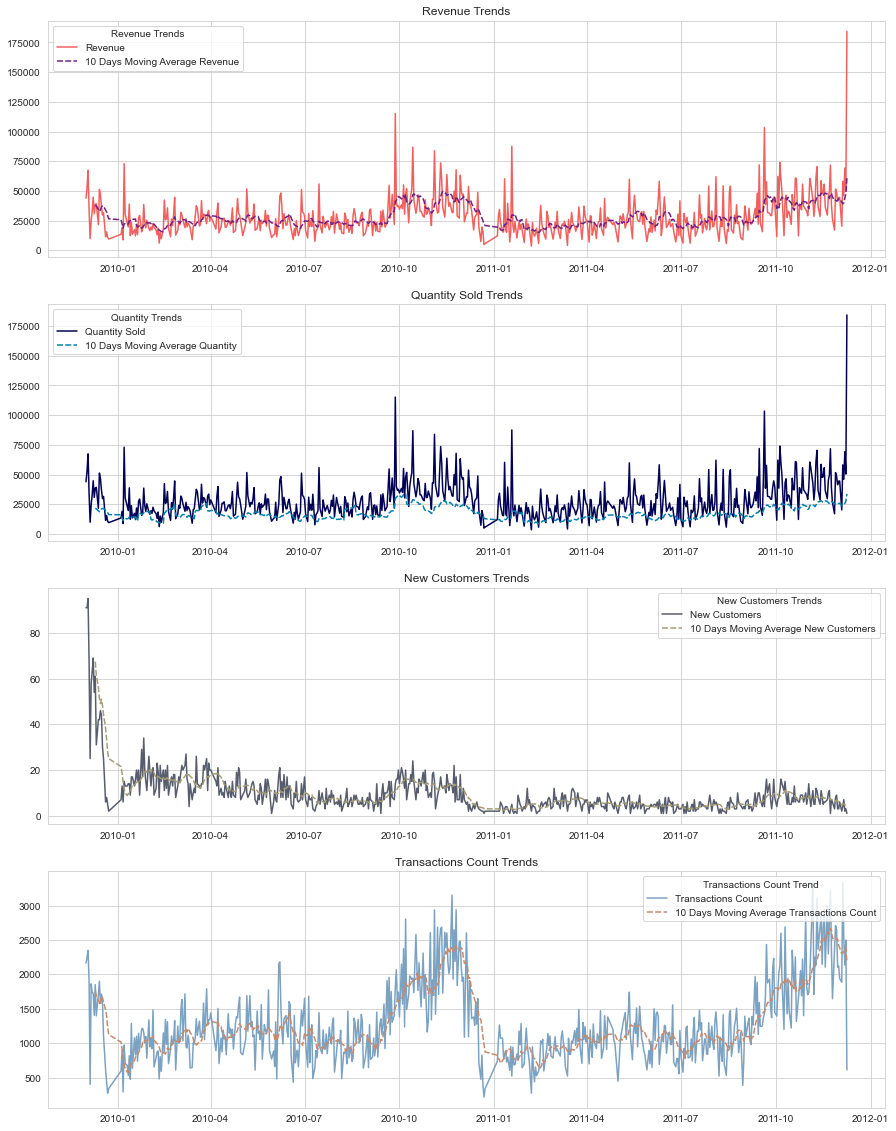

In [129]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,20))
rev = df_new[df_new['TotalPrice']>=0]
rev['TransactionsCount'] = 1
rev = rev.groupby(rev['InvoiceDate'].dt.date).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count',
                                                  'TransactionsCount':'sum'})
rev['10 Days Moving Average Revenue'] = rev['TotalPrice'].rolling(10).mean()
rev['10 Days Moving Average Quantity'] = rev['Quantity'].rolling(10).mean()
rev['10 Days Moving Transactions Count'] = rev['TransactionsCount'].rolling(10).mean()
cust = df_new.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
cust = cust.groupby(cust.InvoiceDate.dt.date).agg({'CustomerID':'count'})
cust['10 Days Moving Average Quantity'] = cust['CustomerID'].rolling(10).mean()

sns.set_style("whitegrid")
sns.lineplot(data=rev[['TotalPrice','10 Days Moving Average Revenue']], palette='magma_r', linewidth=1.5, ax=ax[0],legend=False)
ax[0].legend(title='Revenue Trends', loc='upper left', labels=['Revenue', '10 Days Moving Average Revenue'])
ax[0].title.set_text('Revenue Trends')
ax[0].set_xlabel('')

sns.lineplot(data=rev[['TotalPrice','10 Days Moving Average Quantity']], palette='ocean', linewidth=1.5, ax=ax[1])
ax[1].legend(title='Quantity Trends', loc='upper left', labels=['Quantity Sold', '10 Days Moving Average Quantity'])
ax[1].title.set_text('Quantity Sold Trends')
ax[1].set_xlabel('')

sns.lineplot(data=cust, palette='cividis', linewidth=1.5, ax=ax[2])
ax[2].legend(title='New Customers Trends', loc='upper right', labels=['New Customers', '10 Days Moving Average New Customers'])
ax[2].title.set_text('New Customers Trends')
ax[2].set_xlabel('')

sns.lineplot(data=rev[['TransactionsCount','10 Days Moving Transactions Count']], palette='twilight_shifted', linewidth=1.5, ax=ax[3])
ax[3].legend(title='Transactions Count Trend', loc='upper right', labels=['Transactions Count', '10 Days Moving Average Transactions Count'])
ax[3].title.set_text('Transactions Count Trends')
ax[3].set_xlabel('')

plt.show()

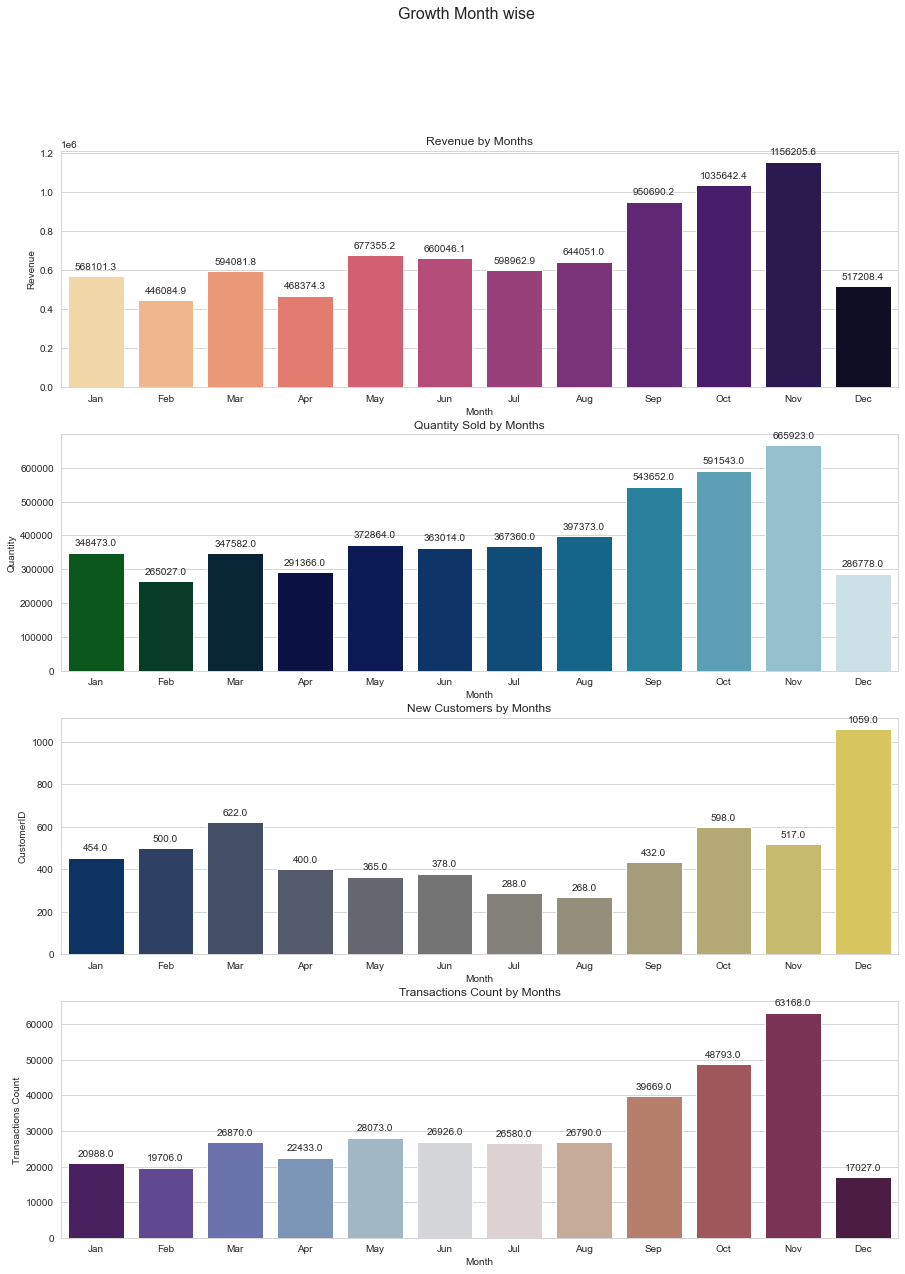

In [130]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,20))
rev = df_new[(df_new['TotalPrice']>0)&(df_new['InvoiceDate'].dt.year==2011)]
rev['Transactions Count'] = 1
rev = rev.groupby(rev['InvoiceDate'].dt.month).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count',
                                                'Transactions Count':'sum'})
rev = rev.reset_index()
rev['Month'] = rev['InvoiceDate'].apply(lambda x: calendar.month_abbr[x])
rev = rev.rename({'TotalPrice':'Revenue'},axis=1)
cust = df_new.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
cust = cust.groupby(cust.InvoiceDate.dt.month).agg({'CustomerID':'count'})
cust = cust.reset_index()
cust['Month'] = cust['InvoiceDate'].apply(lambda x: calendar.month_abbr[x])

sns.set_style("whitegrid")
sns.barplot(data=rev, x=rev.Month, y='Revenue', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue by Months')
add_value_labels(ax[0])

sns.barplot(data=rev, x=rev.Month, y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold by Months')
add_value_labels(ax[1])

sns.barplot(data=cust, x=cust.Month, y='CustomerID',  palette='cividis', ax=ax[2])
ax[2].title.set_text('New Customers by Months')
fig.suptitle('Growth Month wise',fontsize=16)
add_value_labels(ax[2])

sns.barplot(data=rev, x=rev.Month, y='Transactions Count',  palette='twilight_shifted', ax=ax[3])
ax[3].title.set_text('Transactions Count by Months')
fig.suptitle('Growth Month wise',fontsize=16)
add_value_labels(ax[3])

plt.show()

Inferences

- It seems that company’s performance is improving in terms of revenue and sales, but as we are provided with just one year of data, it is hard to claim this for sure
- There might be a seasonal rise during the end of the year.
- In terms of new customer acquisition, we can see a clear downward slope. Though, it can be explained by the fact that, with growing customer base, it is difficult to get more new customers.
- We can compare December sales for 2010 and 2011 to get an insight

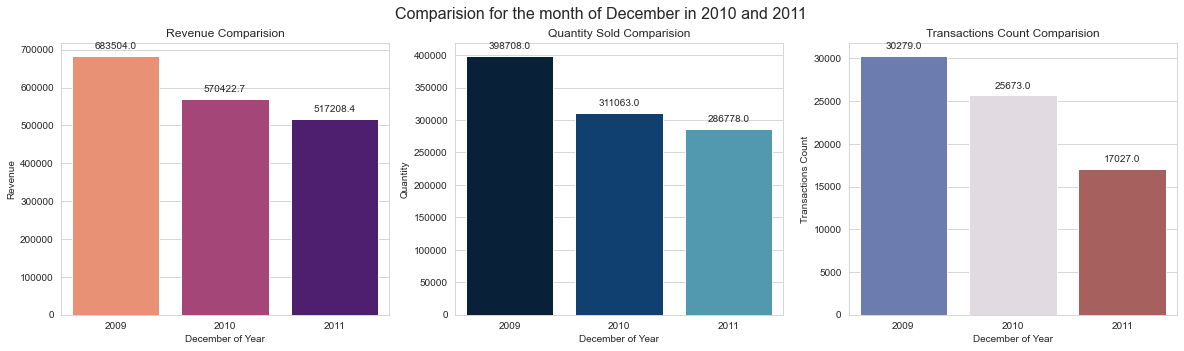

In [131]:
sales_comp = df_new[(df_new['InvoiceDate'].dt.month==12)&(df_new['TotalPrice']>=0)][['InvoiceDate','TotalPrice','Quantity']]
sales_comp['Transactions Count'] = 1
sales_comp = sales_comp.groupby(sales_comp['InvoiceDate'].dt.year)[['TotalPrice','Quantity','Transactions Count']].sum()
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

sns.set_style("whitegrid")
sns.barplot(data=sales_comp, x=sales_comp.index, y='TotalPrice', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue Comparision')
ax[0].set_ylabel('Revenue')
ax[0].set_xlabel('December of Year')
add_value_labels(ax[0])

sns.barplot(data=sales_comp, x=sales_comp.index, y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold Comparision')
add_value_labels(ax[1])
ax[1].set_xlabel('December of Year')

sns.barplot(data=sales_comp, x=sales_comp.index, y='Transactions Count',  palette='twilight_shifted', ax=ax[2])
ax[2].title.set_text('Transactions Count Comparision')
add_value_labels(ax[2])
ax[2].set_xlabel('December of Year')

fig.suptitle('Comparision for the month of December in 2010 and 2011',fontsize=16)

plt.show()

In [132]:
print("Sales Revenue Difference: {:2.2f}% decline in revenue from 2010 \nSales Quantity Difference: {:2.2f}% decline in quantity from 2010".format(
((sales_comp['TotalPrice'][2010] - sales_comp['TotalPrice'][2011]) / sales_comp['TotalPrice'][2010])*100,
    ((sales_comp['Quantity'][2010] - sales_comp['Quantity'][2011]) / sales_comp['Quantity'][2010])*100
))

Sales Revenue Difference: 9.33% decline in revenue from 2010 
Sales Quantity Difference: 7.81% decline in quantity from 2010


This difference could be explained by the fact that the transactions of december 2011 ends at the 09/12/2011, we do not have the data for the entire month.